Calcul de Cm : 0.0008617346718945236
Moyenne des Cm : 0.0008617400355571287
u(Cm) : 2.5013409056028153e-06


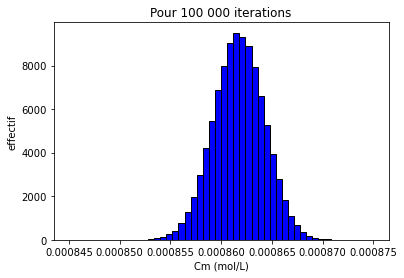

Calcul de C0 : 4.308673359472618e-06
Moyenne des C0 : 4.30877229668685e-06
u(C0) : 1.9227770635056988e-08


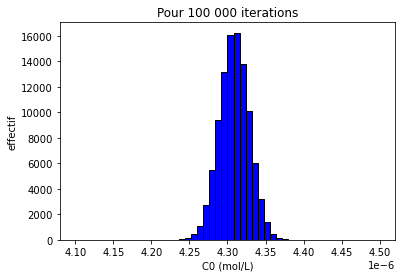

In [1]:
import numpy as np

from matplotlib import pyplot



##########################################################################

#Renvoie une valeur aléatoire de la variable L[0] d'incertitude-type L[1]

def Alea(L):

    tirage=np.random.normal()   #Tirage entre -infini et +infini (loi normale)

    return L[0]+L[1]*tirage

    

###############################################################################

#Entrées

m=[1,2.9e-3]

M=[1160.45,0.01]

Vf1=[1.0000,2.3e-4]

Vp=[5.00e-3,1.7e-5]

Vf2=[1.0000,2.3e-4]

###############################################################################



###############################################################################

#Calcul de Cm et C0

Cm=m[0]/(M[0]*Vf1[0])

C0=Cm*Vp[0]/Vf2[0]

###############################################################################



###############################################################################

#Méthode de Monte Carlo pour trouver l'incertitude sur Cm et C0

#sans composition des incertitudes

LCm,LC0=[],[]

iteration=100000



for i in range(iteration):

    AleaCm=Alea(m)/(Alea(M)*Alea(Vf1))

    AleaC0=AleaCm*Alea(Vp)/Alea(Vf2)

    LCm.append(AleaCm)

    LC0.append(AleaC0)



MoyCm=sum(LCm)/iteration

MoyC0=sum(LC0)/iteration

uCm=(1/(iteration-1)*sum((np.array(LCm)-MoyCm)**2.))**0.5

uC0=(1/(iteration-1)*sum((np.array(LC0)-MoyC0)**2.))**0.5

###############################################################################



###############################################################################

#Affichage

print('Calcul de Cm :',Cm)

print('Moyenne des Cm :',MoyCm)

print('u(Cm) :',uCm)

pyplot.hist(LCm, range = (0.000845, 0.000875), bins = 50, color = 'blue', edgecolor = 'black')

pyplot.xlabel('Cm (mol/L)')

pyplot.ylabel('effectif')

pyplot.title('Pour 100 000 iterations')

pyplot.show()



print('Calcul de C0 :',C0)

print('Moyenne des C0 :',MoyC0)

print('u(C0) :',uC0)

pyplot.hist(LC0, range = (4.10e-6, 4.5e-6), bins = 50, color = 'blue', edgecolor = 'black')

pyplot.xlabel('C0 (mol/L)')

pyplot.ylabel('effectif')

pyplot.title('Pour 100 000 iterations')

pyplot.show()

###############################################################################